In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot4.json'

all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

254

In [3]:
#control is hard condition, exp is easy condition, should change variable names
control_start, exp_start = [], []
control_finish, exp_finish = [], []
starts = [control_start, exp_start]
finishes = [control_finish, exp_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(control_start), len(exp_start))
print(len(control_finish), len(exp_finish))


64 66
60 64


In [4]:
contol_aha, control_pleasant, control_correct = [], [], [] #final ratings for the last anagram
control_pleasant1, control_pleasant2, control_pleasant3, control_pleasant4 = [], [], [],[]
control_aha1, control_aha2, control_aha3, control_aha4 = [], [], [],[]

for entry in control_finish:
    entry_data = entry['data']

    #collect pleasantness ratings
    r = entry_data[4]['responses'] #get people's pleasant rating here
    control_pleasant1.append(int(r[6]))
    
    r = entry_data[8]['responses']
    control_pleasant2.append(int(r[6]))
    
    r = entry_data[12]['responses'] 
    control_pleasant3.append(int(r[6]))
    
    r = entry_data[16]['responses'] 
    control_pleasant4.append(int(r[6]))
    
    #collect aha ratings
    r = entry_data[5]['responses'] #get people's aha rating here
    control_aha1.append(int(r[6]))
    
    r = entry_data[9]['responses']
    control_aha2.append(int(r[6]))
    
    r = entry_data[13]['responses'] 
    control_aha3.append(int(r[6]))
    
    r = entry_data[17]['responses'] 
    control_aha4.append(int(r[6]))
    
    rating = entry_data[21]['responses'] #aha response here
    contol_aha.append(rating[6])
    rating = entry_data[20]['responses'] #pleasant response here
    control_pleasant.append(rating[6])
            
exp_aha, exp_pleasant, exp_correct = [], [], []
exp_pleasant1, exp_pleasant2, exp_pleasant3, exp_pleasant4 = [], [], [],[]
exp_aha1, exp_aha2, exp_aha3, exp_aha4 = [], [], [],[]
for entry in exp_finish:
    entry_data = entry['data']
                    
    #collect pleasantness ratings
    r = entry_data[4]['responses'] #get people's pleasant rating here
    exp_pleasant1.append(int(r[6]))
    
    r = entry_data[8]['responses']
    exp_pleasant2.append(int(r[6]))
    
    r = entry_data[12]['responses'] 
    exp_pleasant3.append(int(r[6]))
    
    r = entry_data[16]['responses'] 
    exp_pleasant4.append(int(r[6]))
    
    #collect aha ratings
    r = entry_data[5]['responses'] #get people's aha rating here
    exp_aha1.append(int(r[6]))
    
    r = entry_data[9]['responses']
    exp_aha2.append(int(r[6]))
    
    r = entry_data[13]['responses'] 
    exp_aha3.append(int(r[6]))
    
    r = entry_data[17]['responses'] 
    exp_aha4.append(int(r[6]))
   
    rating = entry_data[21]['responses'] #aha response here
    exp_aha.append(rating[6])
    rating = entry_data[20]['responses'] #pleasant response here
    exp_pleasant.append(rating[6])
        
def clean(values):
    return [int(value)+1 for value in values]

contol_aha = clean(contol_aha)
control_pleasant = clean(control_pleasant)
exp_aha, exp_pleasant = clean(exp_aha), clean(exp_pleasant)
          
print(len(contol_aha), len(exp_aha))
#print(len(exp_aha), len(exp_pleasant))

60 64


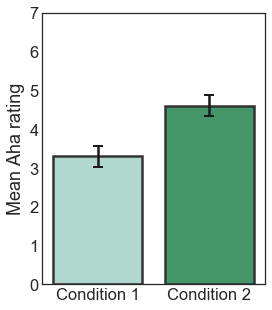

4.6 3.296875


In [5]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(4,5)})

control_aha_mean = np.mean(contol_aha)
control_aha_error = stats.sem(contol_aha)
exp_aha_mean = np.mean(exp_aha)
exp_aha_error = stats.sem(exp_aha)

ax = sns.barplot(
    np.arange(2), 
    [exp_aha_mean, control_aha_mean ],
    yerr=[exp_aha_error, control_aha_error],
    palette="BuGn", errcolor=".2", edgecolor=".2",linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(2), ['Condition 1','Condition 2'])
ax.set(ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
plt.show()
print(control_aha_mean, exp_aha_mean)


In [6]:
t, p = ttest_ind(contol_aha, exp_aha)
print(t, p)

3.38547860531 0.000956400717419


5.28333333333
5.171875


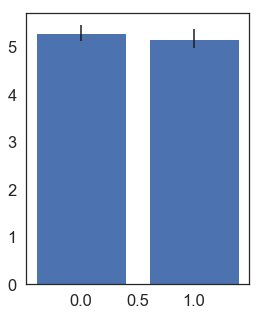

In [7]:
control_pleasant_mean = np.mean(control_pleasant)
control_pleasant_error = stats.sem(control_pleasant)
exp_pleasant_mean = np.mean(exp_pleasant)
exp_pleasant_error = stats.sem(exp_pleasant)

print(control_pleasant_mean)
print(exp_pleasant_mean)

plt.bar(
    np.arange(2),
    [control_pleasant_mean, exp_pleasant_mean],
    yerr=[control_pleasant_error, exp_pleasant_error]
)
plt.show()

In [8]:
t, p = ttest_ind(control_pleasant, exp_pleasant, equal_var=False)
print(t, p)

0.423969927124 0.672358793167


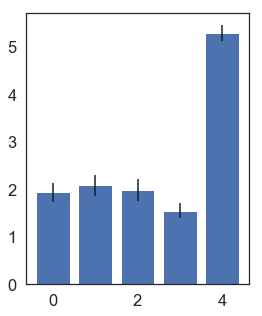

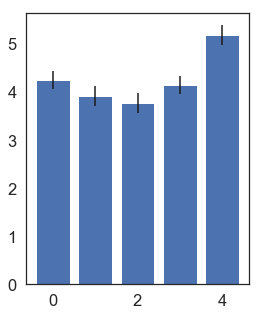

In [9]:
control_pleasant_mean1 = np.mean(control_pleasant1)
control_pleasant_error1 = stats.sem(control_pleasant1)
control_pleasant_mean2 = np.mean(control_pleasant2)
control_pleasant_error2 = stats.sem(control_pleasant2)
control_pleasant_mean3 = np.mean(control_pleasant3)
control_pleasant_error3 = stats.sem(control_pleasant3)
control_pleasant_mean4 = np.mean(control_pleasant4)
control_pleasant_error4 = stats.sem(control_pleasant4)
control_pleasant_mean = np.mean(control_pleasant) #final anagram
control_pleasant_error = stats.sem(control_pleasant)

plt.bar(
    np.arange(5),
    [control_pleasant_mean1, control_pleasant_mean2, control_pleasant_mean3, control_pleasant_mean4, control_pleasant_mean],
    yerr=[control_pleasant_error1, control_pleasant_error2, control_pleasant_error3, control_pleasant_error4, control_pleasant_error]
)
plt.show()

plt.figure(2)

exp_pleasant_mean1 = np.mean(exp_pleasant1)
exp_pleasant_error1 = stats.sem(exp_pleasant1)
exp_pleasant_mean2 = np.mean(exp_pleasant2)
exp_pleasant_error2 = stats.sem(exp_pleasant2)
exp_pleasant_mean3 = np.mean(exp_pleasant3)
exp_pleasant_error3 = stats.sem(exp_pleasant3)
exp_pleasant_mean4 = np.mean(exp_pleasant4)
exp_pleasant_error4 = stats.sem(exp_pleasant4)
exp_pleasant_mean = np.mean(exp_pleasant) #final anagram
exp_pleasant_error = stats.sem(exp_pleasant)

plt.bar(
    np.arange(5),
    [exp_pleasant_mean1, exp_pleasant_mean2, exp_pleasant_mean3, exp_pleasant_mean4, exp_pleasant_mean],
    yerr=[exp_pleasant_error1, exp_pleasant_error2, exp_pleasant_error3, exp_pleasant_error4, exp_pleasant_error]
)
plt.show()


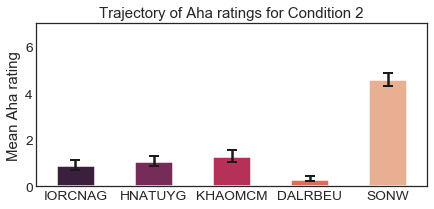

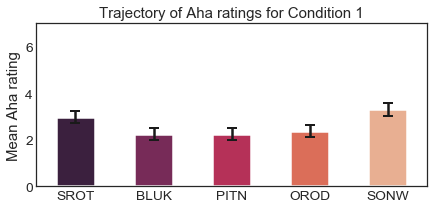

In [10]:
import seaborn as sns
sns.set(style="white", font_scale=1.25, rc={'figure.figsize':(7,3)})

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

control_aha_mean1 = np.mean(control_aha1)
control_aha_error1 = stats.sem(control_aha1)
control_aha_mean2 = np.mean(control_aha2)
control_aha_error2 = stats.sem(control_aha2)
control_aha_mean3 = np.mean(control_aha3)
control_aha_error3 = stats.sem(control_aha3)
control_aha_mean4 = np.mean(control_aha4)
control_aha_error4 = stats.sem(control_aha4)
control_aha_mean = np.mean(contol_aha) #final anagram
control_aha_error = stats.sem(contol_aha)

ax = sns.barplot(
    np.arange(5),
    [control_aha_mean1, control_aha_mean2, control_aha_mean3, control_aha_mean4, control_aha_mean],
    yerr=[control_aha_error1, control_aha_error2, control_aha_error3, control_aha_error4, control_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)

plt.xticks(np.arange(5), ['IORCNAG','HNATUYG', 'KHAOMCM','DALRBEU','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 2', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()

plt.figure(2)

exp_aha_mean1 = np.mean(exp_aha1)
exp_aha_error1 = stats.sem(exp_aha1)
exp_aha_mean2 = np.mean(exp_aha2)
exp_aha_error2 = stats.sem(exp_aha2)
exp_aha_mean3 = np.mean(exp_aha3)
exp_aha_error3 = stats.sem(exp_aha3)
exp_aha_mean4 = np.mean(exp_aha4)
exp_aha_error4 = stats.sem(exp_aha4)
exp_aha_mean = np.mean(exp_aha) #final anagram
exp_aha_error = stats.sem(exp_aha)

ax = sns.barplot(
    np.arange(5),
    [exp_aha_mean1, exp_aha_mean2, exp_aha_mean3, exp_aha_mean4, exp_aha_mean],
    yerr=[exp_aha_error1, exp_aha_error2, exp_aha_error3, exp_aha_error4, exp_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(5), ['SROT','BLUK', 'PITN','OROD','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 1', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()
